In [2]:
import sys
import skvideo.io
import skvideo.datasets

/home/misha/tensorflow/lib/python3.5/site-packages/skvideo/__init__.py:306: UserWarning: ffmpeg/ffprobe not found in path: 
  warnings.warn("ffmpeg/ffprobe not found in path: " + str(path), UserWarning)
/home/misha/tensorflow/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

Using TensorFlow backend.


In [4]:
from keras.optimizers import SGD, RMSprop, Nadam
from keras.utils import np_utils, generic_utils

In [5]:
import tensorflow as tf
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

/home/misha/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


### Image specification + Random

In [7]:
img_rows,img_cols,img_depth=120,160,15
r_state = 42
np.random.seed(r_state)
tf.set_random_seed(r_state)

### Training data

In [8]:
train_nb, test_nb = 196, 100
x_train_0 = np.zeros((0,img_rows,img_cols,img_depth))
x_train_1 = np.zeros((0,img_rows,img_cols,img_depth))# variable to store entire dataset
x_test = np.zeros((0,img_rows,img_cols,img_depth))
print(x_train_0.shape, x_test.shape)

(0, 120, 160, 15) (0, 120, 160, 15)


In [7]:
print(x_test)

[]


In [9]:
def readFrames(vcap,start,end,width,step): # width of the window and step
    x_arr = np.zeros((0,img_rows,img_cols,img_depth))
    
    frame_number = 0
    
    uniq_frames_nb = end - start + width - (end - start) % width
    
    uniq_frames_nb = uniq_frames_nb - (uniq_frames_nb - width) % step
    
    print('uniq frames: ', uniq_frames_nb)
    frames = []

    for frame in vcap:

        if (frame_number >= start and frame_number < start + uniq_frames_nb):

            
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            res_img = cv2.resize(frame, (img_cols, img_rows), interpolation=cv2.INTER_AREA)
            frames.append(res_img)
#             print(frame_number, res_img)
        if frame_number > start + uniq_frames_nb:
            frame_number = 0
            break
        frame_number += 1
        
    # sliding window itself
#     print(frames)
    nb_x = (uniq_frames_nb - width) / step + 1
    print('adding',nb_x,'windows')
    for i in range(int(nb_x)):
        fr_arr = np.zeros((img_depth,img_rows,img_cols))
        for j in range(img_depth):
            fr_arr[j] = frames[i * step + j]
        fr_arr = np.rollaxis(fr_arr,0,3)
        fr_arr = np.expand_dims(fr_arr, axis = 0)
        x_arr = np.concatenate((x_arr, fr_arr), axis=0) 
        
    return x_arr

In [101]:
print(x_train.shape)

(196, 120, 160, 15)


In [22]:
print(np.array_equal(x_train_0[1],x_train_0[3]))

False


In [128]:
print(X_val_new.shape)

(40, 120, 160, 15, 1)


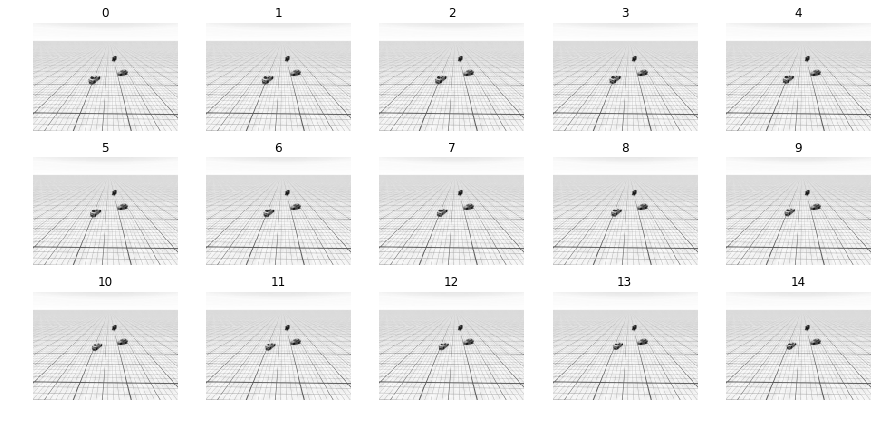

In [25]:
vid_to_viz = x_train_0[1]
# vid_to_viz = np.flip(np.squeeze(X_val_new[5], axis=3),1)
vid_to_viz = np.rollaxis(vid_to_viz, 2, 0)
_, axes = plt.subplots(ncols=5,nrows=3,figsize=(15,7))
for i in range(3):
    for j in range(5):
        axes[i][j].axis('off')
        axes[i][j].set_title(i * 5 + j)
        axes[i][j].imshow(vid_to_viz[i * 5 + j],cmap = 'gray')
                   
plt.show()

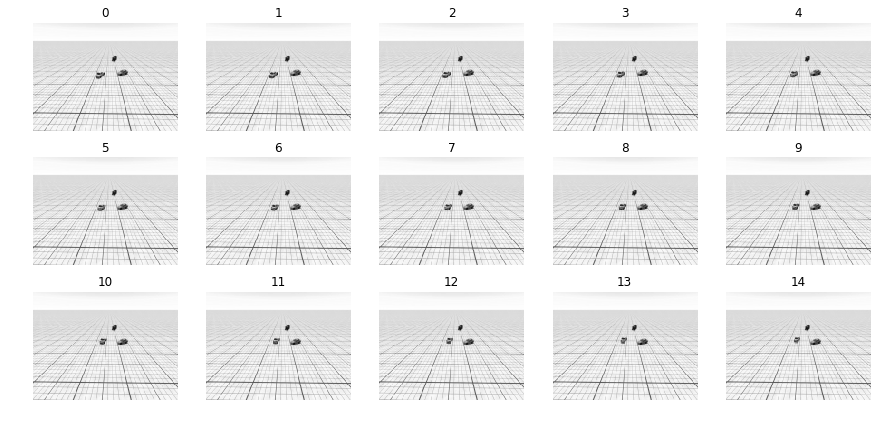

In [26]:
vid_to_viz = x_train_0[3]
# vid_to_viz = np.flip(np.squeeze(X_val_new[5], axis=3),1)
vid_to_viz = np.rollaxis(vid_to_viz, 2, 0)
_, axes = plt.subplots(ncols=5,nrows=3,figsize=(15,7))
for i in range(3):
    for j in range(5):
        axes[i][j].axis('off')
        axes[i][j].set_title(i * 5 + j)
        axes[i][j].imshow(vid_to_viz[i * 5 + j],cmap = 'gray')
                   
plt.show()

In [16]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
cap = cv2.VideoCapture(filename + '.mov')
ret, frame = cap.read()
# cap.set(1,1)
# ret, frame = cap.read()

# for i in videodata:
#     img = i
#     break

plt.plot(frame)
plt.show()

# x_train_0 = readFrames(videodata,400,680,img_depth,10)

ValueError: x and y must not be None

In [19]:
for i in videodata:
    img = i
    break
plt.plot(img)
plt.show()

AssertionError: Cannot find installation of ffmpeg.

In [18]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')

# x_train = np.concatenate((x_train_0,readFrames(videodata,6150,6360,img_depth,5)), axis = 0)

In [96]:
# class 1
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')

x_train = np.concatenate((x_train,readFrames(videodata,3480,3610,img_depth,5)), axis = 0)

uniq frames:  135
adding 25.0 windows


In [97]:
x_train = np.concatenate((x_train,readFrames(videodata,3760,3800,img_depth,5)), axis = 0)

uniq frames:  45
adding 7.0 windows


In [98]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
x_train = np.concatenate((x_train,readFrames(videodata,3980,4080,img_depth,5)), axis = 0)

uniq frames:  105
adding 19.0 windows


In [99]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
x_train = np.concatenate((x_train,readFrames(videodata,4380,4550,img_depth,5)), axis = 0)

uniq frames:  180
adding 34.0 windows


In [100]:
filename = '/home/misha/Documents/Thesis/Dataset/BNG_white_1'
videodata = skvideo.io.vreader(filename + '.mov')
x_train = np.concatenate((x_train,readFrames(videodata,6410,6480,img_depth,5)), axis = 0)

uniq frames:  75
adding 13.0 windows


### Open files

### Reading accident class training

##### Image resize

### Reading all frames classes (takes long time)

### CNN Training parameters

In [17]:
print(x_train.shape)

(0, 120, 160, 15)


In [ ]:

x_train = np.expand_dims(x_train, axis=4)
print(x_train.shape)

##### Assign label to each class

In [107]:
y_train = np.ones((x_train.shape[0],),dtype=int)
y_train[0:98] = 0
y_train[98:] = 1
print(y_train.shape)

(196,)


##### CNN training parameters

In [120]:
batch_size = 4
nb_classes = 2 
nb_epoch = 10


##### convert class vectors to binary class matrices

In [109]:
y_train = np_utils.to_categorical(y_train, nb_classes)

##### number of convolutional filters to use at each layer

In [110]:
nb_filters = [32, 32]

##### level of pooling to perform at each layer (POOL x POOL)

In [111]:
nb_pool = [2, 2]

##### Level of convolution to perform at each layer (CONV x CONV)

In [112]:
nb_conv = [3,3]

### Pre-processing

In [113]:
x_train = x_train.astype('float32')

# train_set -= np.mean(train_set)

x_train /=np.max(x_train)

In [ ]:
print(img_rows, img_cols, img_depth)

### Define model

In [137]:
model = Sequential()
model.add(Convolution3D(16, (4, 4, 1),
input_shape=(img_rows, img_cols, img_depth, 1), activation='relu'))

# model.add(Convolution3D(16, (3, 3, 2), activation='relu'))

model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
model.add(Dropout(0.2))

model.add(Convolution3D(32, (4, 4, 4), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 2)))
model.add(Dropout(0.2))

model.add(Convolution3D(64, (3, 3, 2), activation='relu'))
model.add(Dropout(0.2))

# model.add(Convolution3D(128, (1, 1, 1), activation='relu'))

model.add(MaxPooling3D(pool_size=(2, 2, 1)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, init='normal', activation='relu'))
model.add(Dense(256, init='normal', activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(nb_classes,init='normal'))

model.add(Activation('softmax'))

# model.optimizer.lr.assign(0.1)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Nadam(lr=0.001))


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", kernel_initializer="normal")`
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, kernel_initializer="normal")`


In [124]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_7 (Conv3D)            (None, 117, 157, 15, 16)  272       
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 58, 78, 7, 16)     0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 58, 78, 7, 16)     0         
_________________________________________________________________
conv3d_8 (Conv3D)            (None, 55, 75, 4, 32)     32800     
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 27, 37, 2, 32)     0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 27, 37, 2, 32)     0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 25, 35, 1, 64)     36928     
__________

In [116]:
# Split the data
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(x_train, y_train, test_size=0.2, random_state=r_state)

In [118]:
X_train_new = np.expand_dims(X_train_new, axis=4)
print(X_train_new.shape)

X_val_new = np.expand_dims(X_val_new, axis=4)
print(X_val_new.shape)

(156, 120, 160, 15, 1)
(40, 120, 160, 15, 1)


#### Training

In [138]:
hist = model.fit(X_train_new, y_train_new, validation_data=(X_val_new,y_val_new),
          batch_size=batch_size, epochs=nb_epoch, shuffle=True)

Train on 156 samples, validate on 40 samples
Epoch 1/10
156/156 [==============================] - 3s - loss: 0.7271 - acc: 0.4359 - val_loss: 0.6933 - val_acc: 0.4750
Epoch 2/10
156/156 [==============================] - 3s - loss: 0.7159 - acc: 0.4551 - val_loss: 0.6917 - val_acc: 0.4750
Epoch 3/10
156/156 [==============================] - 3s - loss: 0.6640 - acc: 0.6731 - val_loss: 1.5500 - val_acc: 0.4750
Epoch 4/10
156/156 [==============================] - 3s - loss: 0.2333 - acc: 0.9487 - val_loss: 0.4130 - val_acc: 0.9000
Epoch 5/10
156/156 [==============================] - 3s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.4086 - val_acc: 0.9000
Epoch 6/10
156/156 [==============================] - 3s - loss: 1.3427e-04 - acc: 1.0000 - val_loss: 0.4013 - val_acc: 0.9000
Epoch 7/10
156/156 [==============================] - 3s - loss: 7.7282e-05 - acc: 1.0000 - val_loss: 0.4077 - val_acc: 0.9000
Epoch 8/10
156/156 [==============================] - 3s - loss: 5.7683e-05 - acc: 1.0

### Split the data

### Train the model

### Evaluate the model

In [134]:
X_val_new = np.flip(X_val_new, 2)

In [ ]:
X_val_new = np.

In [139]:
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 


24/40 [=================>............] - ETA: 0sTest score: 0.393302542297
Test accuracy: 0.9


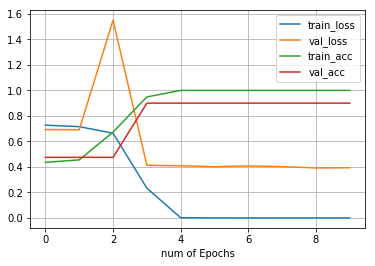

In [140]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.plot(train_loss)
plt.plot(val_loss)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.grid(True)
plt.legend(['train_loss','val_loss','train_acc', 'val_acc'])

plt.show()

### Plots the result

In [ ]:
# train_loss=hist.history['loss']
# val_loss=hist.history['val_loss']
# train_acc=hist.history['acc']
# val_acc=hist.history['val_acc']
# xc=range(10)

# plt.figure(1,figsize=(7,5))
# plt.plot(xc,train_loss)
# plt.plot(xc,val_loss)
# plt.xlabel('num of Epochs')
# plt.ylabel('loss')
# plt.title('train_loss vs val_loss')
# plt.grid(True)
# plt.legend(['train','val'])
# print(plt.style.available) # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])

# plt.figure(2,figsize=(7,5))
# plt.plot(xc,train_acc)
# plt.plot(xc,val_acc)
# plt.xlabel('num of Epochs')
# plt.ylabel('accuracy')
# plt.title('train_acc vs val_acc')
# plt.grid(True)
# plt.legend(['train','val'],loc=4)
# #print plt.style.available # use bmh, classic,ggplot for big pictures
# plt.style.use(['classic'])